Shape of dataset: (400, 11)

Preview:
    Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Education Urban   US  
0         17   Yes  Yes  
1         10   Yes  Yes  
2         12   Yes  Yes  
3         14   Yes  Yes  
4         13   Yes   No  

Missing values:
 Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64


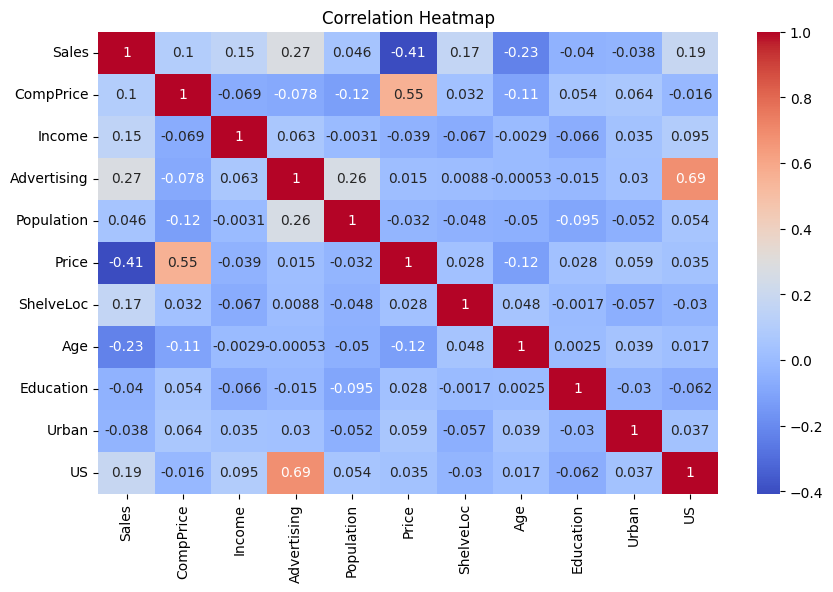


Decision Tree RMSE: 2.3364651977406306
Decision Tree R² Score: 0.44314729275898534

Best Decision Tree Parameters: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10}
Tuned Decision Tree R²: 0.445533527291862
Decision Tree → R²: 0.4455, RMSE: 2.3315
Random Forest → R²: 0.6175, RMSE: 1.9365
Bagging → R²: 0.5652, RMSE: 2.0645
AdaBoost → R²: 0.6026, RMSE: 1.9737
Gradient Boosting → R²: 0.7311, RMSE: 1.6235


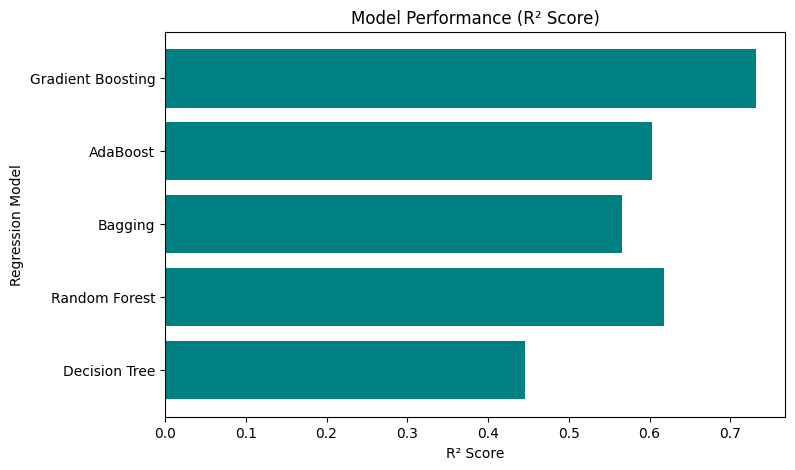


✅ Best Performing Model: Gradient Boosting with R² = 0.7311

Insights:
- Decision Tree provides interpretability but may overfit.
- Ensemble models like Random Forest or Gradient Boosting usually achieve higher accuracy.
- Feature scaling, outlier removal, and categorical encoding improved results.


In [3]:
# Step 1: Import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Step 2: Load the dataset

df = pd.read_csv("Company_Data.csv")

print("Shape of dataset:", df.shape)
print("\nPreview:\n", df.head())

# Step 3: Data Preprocessing

print("\nMissing values:\n", df.isnull().sum())

# Drop or fill missing values
df = df.dropna()

# Encode categorical variables if any
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# Remove outliers using IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Step 4: Split Data

target_col = 'Sales' if 'Sales' in df.columns else df.columns[-1]

X = df.drop(columns=[target_col])
y = df[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 5: Decision Tree Regressor

dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("\nDecision Tree RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_dt)))
print("Decision Tree R² Score:", r2_score(y_test, y_pred_dt))

# Step 6: Hyperparameter Tuning

param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42),
                           param_grid,
                           cv=5,
                           scoring='r2',
                           n_jobs=-1)
grid_search.fit(X_train, y_train)

best_dt = grid_search.best_estimator_
best_pred = best_dt.predict(X_test)
print("\nBest Decision Tree Parameters:", grid_search.best_params_)
print("Tuned Decision Tree R²:", r2_score(y_test, best_pred))

# Step 7: Ensemble Regressors

models = {
    "Decision Tree": best_dt,
    "Random Forest": RandomForestRegressor(random_state=42),
    "Bagging": BaggingRegressor(random_state=42),
    "AdaBoost": AdaBoostRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

scores = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    r2 = r2_score(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    scores[name] = r2
    print(f"{name} → R²: {r2:.4f}, RMSE: {rmse:.4f}")

# Step 8: Accuracy Comparison Chart

plt.figure(figsize=(8,5))
plt.barh(list(scores.keys()), list(scores.values()), color='teal')
plt.title("Model Performance (R² Score)")
plt.xlabel("R² Score")
plt.ylabel("Regression Model")
plt.show()

# Step 9: Conclusions

best_model = max(scores, key=scores.get)
print(f"\n✅ Best Performing Model: {best_model} with R² = {scores[best_model]:.4f}")

print("\nInsights:")
print("- Decision Tree provides interpretability but may overfit.")
print("- Ensemble models like Random Forest or Gradient Boosting usually achieve higher accuracy.")
print("- Feature scaling, outlier removal, and categorical encoding improved results.")
